In [1]:
import gmplot
import io
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import peakutils 
from peakutils.plot import plot as pplot
import scipy
from math import sqrt
from scipy.integrate import quad
from numpy import trapz
from scipy.integrate import simps
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
import chart_studio.plotly as py
import plotly.graph_objs as go
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator

In [2]:
data = pd.read_csv("Dataset-2+.csv")
data.head()

,GPS Time,Device Time,Longitude,Latitude,GPS Speed (Meters/second),Horizontal Dilution of Precision,Altitude,Bearing,G(x),G(y),...,Trip average MPG(mpg),Trip Distance(km),Trip Time(Since journey start)(s),Trip time(whilst moving)(s),Trip time(whilst stationary)(s),Turbo Boost & Vacuum Gauge(psi),Turbo Pressure Control(psi),Voltage (Control Module)(V),Voltage (OBD Adapter)(V),Volumetric Efficiency (Calculated)(%)
0,Thu Jan 02 16:32:45 GMT+05:30 2020,32:44.8,78.529926,17.342657,0.0,3.216,421.160156,0.0,0.703192,6.832623,...,30.378777,-,0,0.0,0.0,-9.427454,-,14.112,14.2,-
1,Thu Jan 02 16:32:46 GMT+05:30 2020,32:45.8,78.529926,17.342657,0.0,3.216,421.167358,0.0,0.582221,7.205120,...,30.378777,-,0,0.0,0.0,-8.992340,-,14.112,14.2,-
2,Thu Jan 02 16:32:47 GMT+05:30 2020,32:46.8,78.529926,17.342657,0.0,3.216,421.182739,0.0,0.291170,6.995516,...,30.378777,-,0,0.0,0.0,-8.992340,-,14.017,14.2,-
3,Thu Jan 02 16:32:48 GMT+05:30 2020,32:47.8,78.529926,17.342657,0.0,3.216,421.184937,0.0,5.044997,5.904375,...,30.378777,-,0,0.0,0.0,-8.992340,-,14.017,14.1,-
4,Thu Jan 02 16:32:49 GMT+05:30 2020,32:48.8,78.529926,17.342657,0.0,3.216,421.189392,0.0,7.363820,2.079994,...,30.378777,-,0,0.0,0.0,-8.992340,-,14.017,14.1,-


In [3]:
data.shape

(568, 82)

In [4]:
time = data['Time']
Accx = data['Accx']
Accy = data['Accy']
Accz = data['Accz']
Lat = data['Latitude']
Longi = data['Longitude']

def Plot1(x,y,a,b):

    plt.plot(x,y,'b')
    indexes = peakutils.indexes(y, thres=0.9, min_dist=10)
    print(indexes)
    print(x[indexes], y[indexes])
    plt.figure()
    pplot(x,y,indexes)
    plt.title('Peaks')
    plt.xlabel(a)
    plt.ylabel(b)
    
def Plot2(x_list,y_list,x_label,y_label,plot_title):
    plt.plot(x_list,y_list)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(plot_title)
    
def mean_rolling(List_name):
    chunks = [List_name[i:i+2] for i in range(0,len(List_name),2)]
    d = []
    for i in chunks:
        s = 0 
        for j in i:
            s += j/2
        d.append(s)
    print(d)
    return

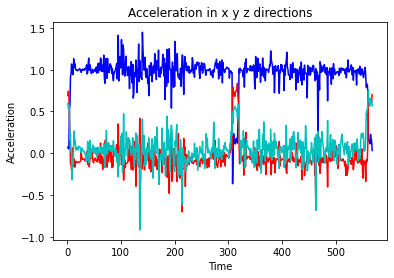

In [5]:
def Plot(x_direction,y_direction,z_direction,Time_parameter,x_label,y_label,plot_title):
  
    plt.figure()
    plt.plot(Time_parameter,x_direction,'b')
    plt.plot(Time_parameter,y_direction,'r')
    plt.plot(Time_parameter,z_direction,'c')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(plot_title)
    
Plot(Accx,Accy,Accz,time,'Time','Acceleration','Acceleration in x y z directions')

In [6]:
gmap = gmplot.GoogleMapPlotter(12.9716,77.5946, 13)
gmap.plot(Lat, Longi,  
           'black', edge_width = 2.5) 
gmap.draw("map.html")

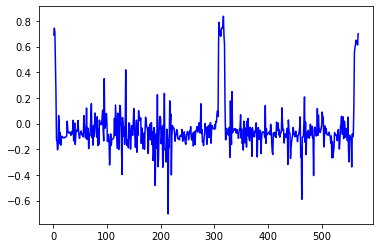

In [7]:
# pothole detection

plt.plot(time,Accy,'b')

[  7  19  40  53  65  82  93 104 127 143 155 176 189 200 213 226 246 260
 279 293 328 353 365 379 395 408 421 436 449 462 473 484 503 518 532 543
 555]
[  8  20  41  54  66  83  94 105 128 144 156 177 190 201 214 227 247 261
 280 294 329 354 366 380 396 409 422 437 450 463 474 485 504 519 533 544
 556] [-0.20443369 -0.11261924 -0.16267766 -0.09100866 -0.19503248 -0.17073584
 -0.13520658 -0.32262039 -0.39636502 -0.19869529 -0.22323614 -0.23324783
 -0.48195267 -0.15669507 -0.70330858 -0.13740426 -0.16084626 -0.17403239
 -0.17122422 -0.15266599 -0.26291656 -0.20602091 -0.13410774 -0.25974214
 -0.15461947 -0.24032927 -0.10578199 -0.31859133 -0.10248546 -0.58951718
 -0.10907853 -0.40454528 -0.18184637 -0.26670149 -0.19784065 -0.10675873
 -0.3378821 ]


Text(0, 0.5, 'Acceleration in the y direction')

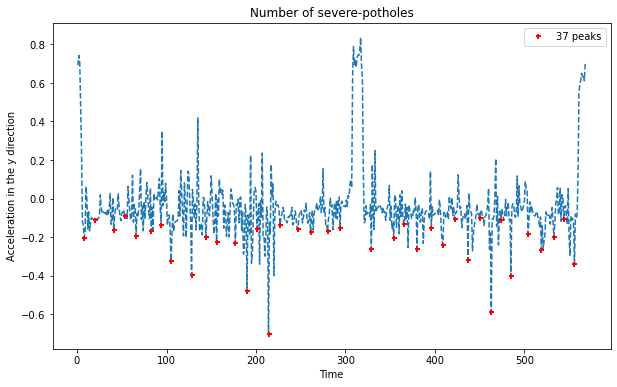

In [10]:
x = np.array(time)
y = np.array(Accy)
indexes = peakutils.indexes(-y, thres=0.6, min_dist=10)
print(indexes)
print(x[indexes], y[indexes])
plt.figure(figsize=(10,6))
pplot(x, y, indexes)
plt.title('Number of severe-potholes')
plt.xlabel('Time')
plt.ylabel('Acceleration in the y direction')

In [12]:
c=data.Accy<-0.2
data[c]


,GPS Time,Device Time,Longitude,Latitude,GPS Speed (Meters/second),Horizontal Dilution of Precision,Altitude,Bearing,G(x),G(y),...,Trip average MPG(mpg),Trip Distance(km),Trip Time(Since journey start)(s),Trip time(whilst moving)(s),Trip time(whilst stationary)(s),Turbo Boost & Vacuum Gauge(psi),Turbo Pressure Control(psi),Voltage (Control Module)(V),Voltage (OBD Adapter)(V),Volumetric Efficiency (Calculated)(%)
7,Thu Jan 02 16:32:52 GMT+05:30 2020,32:51.8,78.529926,17.342657,0.00,3.216000,421.200500,0.0,9.566463,-0.668818,...,30.378777,-,0,0.000000,0.000000,-8.992340,-,14.017,14.1,-
104,Thu Jan 02 16:34:29 GMT+05:30 2020,34:28.8,78.529199,17.343106,5.80,9.648001,423.354492,207.6,7.500363,-0.545451,...,25.752346,0.21170583,71,71.456001,0.000000,-9.137378,-,13.970,14.2,-
105,Thu Jan 02 16:34:30 GMT+05:30 2020,34:29.8,78.529156,17.343043,5.83,9.648001,417.848511,208.6,8.252543,0.315724,...,25.752346,0.21570903,72,72.454002,0.000000,-2.030529,-,14.112,13.8,-
121,Thu Jan 02 16:34:46 GMT+05:30 2020,34:45.8,78.528931,17.342589,3.86,9.648001,413.793945,209.3,9.039457,-2.488183,...,27.220264,0.27130052,88,88.485001,0.000000,-2.465642,-,14.135,14.0,-
127,Thu Jan 02 16:34:52 GMT+05:30 2020,34:51.8,78.528807,17.342332,5.36,9.648001,411.932739,206.1,11.275637,-2.284568,...,27.797298,0.30249506,94,94.445999,0.000000,-8.122114,-,13.805,14.1,-
155,Thu Jan 02 16:35:20 GMT+05:30 2020,35:19.8,78.528324,17.341265,4.06,9.648001,376.597046,190.0,9.383209,-1.783913,...,29.142902,0.42152876,122,122.525001,0.000000,-2.175567,-,13.805,14.1,-
176,Thu Jan 02 16:35:41 GMT+05:30 2020,35:40.8,78.528218,17.340581,3.90,25.728000,363.927002,199.0,10.483932,-0.001677,...,30.140202,0.51202971,143,143.501007,0.000000,-4.206095,-,14.017,14.1,-
185,Thu Jan 02 16:35:50 GMT+05:30 2020,35:49.8,78.528177,17.340112,5.45,36.448000,360.077637,198.3,8.919683,-0.836501,...,31.476961,0.56386596,152,152.514999,0.000000,-3.916019,-,13.876,14.0,-
186,Thu Jan 02 16:35:51 GMT+05:30 2020,35:50.8,78.528162,17.340057,5.51,38.592003,360.881653,199.0,8.518441,-2.253427,...,31.476961,0.57220221,153,153.518997,0.000000,-4.061057,-,14.112,14.2,-
189,Thu Jan 02 16:35:54 GMT+05:30 2020,35:53.8,78.527872,17.339792,3.64,9.648001,414.535523,202.8,8.767571,-1.858173,...,32.534752,0.59050053,156,156.514008,0.000000,-8.702265,-,14.017,14.0,-


In [13]:
lati = [17.341075]
long = [78.535684]
gmap = gmplot.GoogleMapPlotter(12.9716,77.5946, 13)
gmap.scatter(lati, long,  
           'yellow',size = 40, marker = False) 
gmap.draw("Speed_Breakers.html")